### 1. Data 생성하기
##### MNIST 이미지 데이타 받아와서 CSV 데이타로 가공하기

In [1]:
import urllib.request as req
import gzip, os, os.path

savepath = "./mnist" # 다운 받을 위치
baseurl = "http://yann.lecun.com/exdb/mnist" # 사이트에서 데이터를 다운 받아옴.
files = [ # 이렇게 구분해서 다운 받아옴.
    "train-images-idx3-ubyte.gz", # 트레이닝 이미지
    "train-labels-idx1-ubyte.gz", # 트레이닝 라벨
    "t10k-images-idx3-ubyte.gz", # 테스트 이미지
    "t10k-labels-idx1-ubyte.gz" # 테스트 라벨
]

if not os.path.exists(savepath): os.mkdir(savepath) # 폴더를 만들어서 저장함
for f in files:
    url = baseurl + "/" + f
    loc = savepath + "/" + f
    print("download:", url)
    if not os.path.exists(loc):
        req.urlretrieve(url, loc)

for f in files:
    gz_file = savepath + "/" + f
    raw_file = savepath + "/" + f.replace(".gz", "")
    print("gzip:",f)
    with gzip.open(gz_file, "rb") as fp:
        body = fp.read()
        with open(raw_file, "wb") as w:
            w.write(body)
print("Download ok")

import struct

def to_csv(name, maxdata):
    # 레이블 파일과 이미지 파일 열기
    lbl_f = open("./mnist/"+name+"-labels-idx1-ubyte", "rb")
    img_f = open("./mnist/"+name+"-images-idx3-ubyte", "rb")
    csv_f = open("./mnist/"+name+".csv", "w", encoding="utf-8")
    #헤더 정보 읽기
    mag, lbl_count = struct.unpack(">II", lbl_f.read(8))
    mag, img_count = struct.unpack(">II", img_f.read(8))
    rows, cols = struct.unpack(">II", img_f.read(8))
    pixels = rows * cols
    # 이미지 데이터를 읽고 CSV로 저장하기
    # CSV파일로 바꿔서 저장하는 코드 
    res = []
    for idx in range(lbl_count):
        if idx > maxdata: break
        label = struct.unpack("B", lbl_f.read(1))[0]
        bdata=img_f.read(pixels)
        sdata = list(map(lambda n: str(n), bdata))
        csv_f.write(str(label)+",")
        csv_f.write(",".join(sdata)+"\r\n")
        # 잘 저장됐는지 이미지 파일로 저장해서 테스트하기
        if idx<10:
            s="P2 28 28 255\n"
            s +=" ".join(sdata)
            iname = "./mnist/{0}-{1}-{2}.pgm".format(name,idx,label)
            with open(iname, "w", encoding="utf-8") as f:
                f.write(s)
    csv_f.close()
    lbl_f.close()
    img_f.close()

# 결과를 파일로 출력하기..
to_csv("train", 10000) # 1000개만 돌리던것을... 10000으로 바꿈
to_csv("t10k", 1000)  # 500에서 1000으로 변경 ... 이유는 학습량을 높히기 위해서
print("Convert CSV OK!") # 성공적으로 변환하면 출력됨

download: http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz
download: http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz
gzip: train-images-idx3-ubyte.gz
gzip: train-labels-idx1-ubyte.gz
gzip: t10k-images-idx3-ubyte.gz
gzip: t10k-labels-idx1-ubyte.gz
Download ok
Convert CSV OK!


### 2. Label에 따른 데이타 확인하기

In [2]:
#
data = '5	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	3	18	18	18	126	136	175	26	166	255	247	127	0	0	0	0	0	0	0	0	0	0	0	0	30	36	94	154	170	253	253	253	253	253	225	172	253	242	195	64	0	0	0	0	0	0	0	0	0	0	0	49	238	253	253	253	253	253	253	253	253	251	93	82	82	56	39	0	0	0	0	0	0	0	0	0	0	0	0	18	219	253	253	253	253	253	198	182	247	241	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	80	156	107	253	253	205	11	0	43	154	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	14	1	154	253	90	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	139	253	190	2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	11	190	253	70	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	35	241	225	160	108	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	81	240	253	253	119	25	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	45	186	253	253	150	27	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	16	93	252	253	187	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	249	253	249	64	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	46	130	183	253	253	207	2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	39	148	229	253	253	253	250	182	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	24	114	221	253	253	253	253	201	78	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	23	66	213	253	253	253	253	198	81	2	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	18	171	219	253	253	253	253	195	80	9	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	55	172	226	253	253	253	253	244	133	11	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	136	253	253	253	212	135	132	16	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0'
data = data.split() # 디포트값은 공백이다
# print(data)

In [3]:
count = 0
for i in data:
    print(f'{i}', end="  ")
    count+=1
    if count % 28==0:
        print()
        
# 이미지에서는 특성값이 픽셀값이다.

5  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  3  18  18  18  126  136  175  26  166  255  247  127  0  0  0  
0  0  0  0  0  0  0  0  0  30  36  94  154  170  253  253  253  253  253  225  172  253  242  195  64  0  0  0  
0  0  0  0  0  0  0  0  49  238  253  253  253  253  253  253  253  253  251  93  82  82  56  39  0  0  0  0  
0  0  0  0  0  0  0  0  18  219  253  253  253  253  253  198  182  247  241  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  80  156  107  253  253  205  11  0  43  154  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  14  1  154  

In [4]:
data = '9	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	18	105	227	253	253	122	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	57	199	253	252	252	252	252	159	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	20	211	252	232	152	73	167	252	215	6	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	197	252	182	0	0	0	37	235	243	47	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	188	252	103	0	0	0	37	235	229	27	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	189	253	86	8	43	139	190	211	45	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	232	252	200	201	252	252	84	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	213	245	252	253	252	242	42	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	56	84	253	252	160	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	45	253	252	38	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	89	255	253	38	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	80	253	189	32	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	41	179	232	84	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	15	225	252	115	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	153	252	164	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	68	245	243	79	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	32	237	245	82	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	9	148	252	169	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	106	253	196	7	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	54	228	129	28	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0'
data = data.split()

In [5]:
count = 0
for i in data:
    print(f'{i}', end="  ")
    count+=1
    if count % 28==0:
        print()

9  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  18  105  227  253  253  122  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  57  199  253  252  252  252  252  159  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  20  211  252  232  152  73  167  252  215  6  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  197  252  182  0  0  0  37  235  243  47  0  0  0  0  0  0  
0  0  0  0 

### 3. 머신러닝 학습하기

* train.csv , t10k.csv 파일 읽어서 train, test 변수에 할당
* train_data, train_label, test_data, test_label을 iloc를 이용해서 각각 지정
* SVM 모델 생성 
* 학습시킴
* 예측함
* 정확도 출력

In [6]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#
train = pd.read_csv('./mnist/train.csv')
test = pd.read_csv('./mnist/t10k.csv')

# train_data
train_data = train.iloc[ :, 1: ]
train_label = train.iloc[:, 0]

test_data = test.iloc[ :, 1: ]
test_label = test.iloc[:,0]

In [7]:
model = SVC()

In [8]:
model.fit(train_data,train_label)

SVC()

In [9]:
predict = model.predict(test_data)

In [10]:
score = accuracy_score(predict, test_label)

In [11]:
print(round(score*100)) # underfitting 됨... 학습 량이 부족해서 그러하다.

95


In [12]:
import pickle # 텍스트 이외의 자료형을 파일로 저장하기 위한 모듈이다. pkl파일이 텍스트가 아니라는 것.
with open('./mnist_model.pkl','wb') as f: # mnist_model.pkl 파일은 mnist데이터를 학습한 머신의 뇌라고 생각하면 된다.
    pickle.dump(model, f) # dump함수를 활용해서 

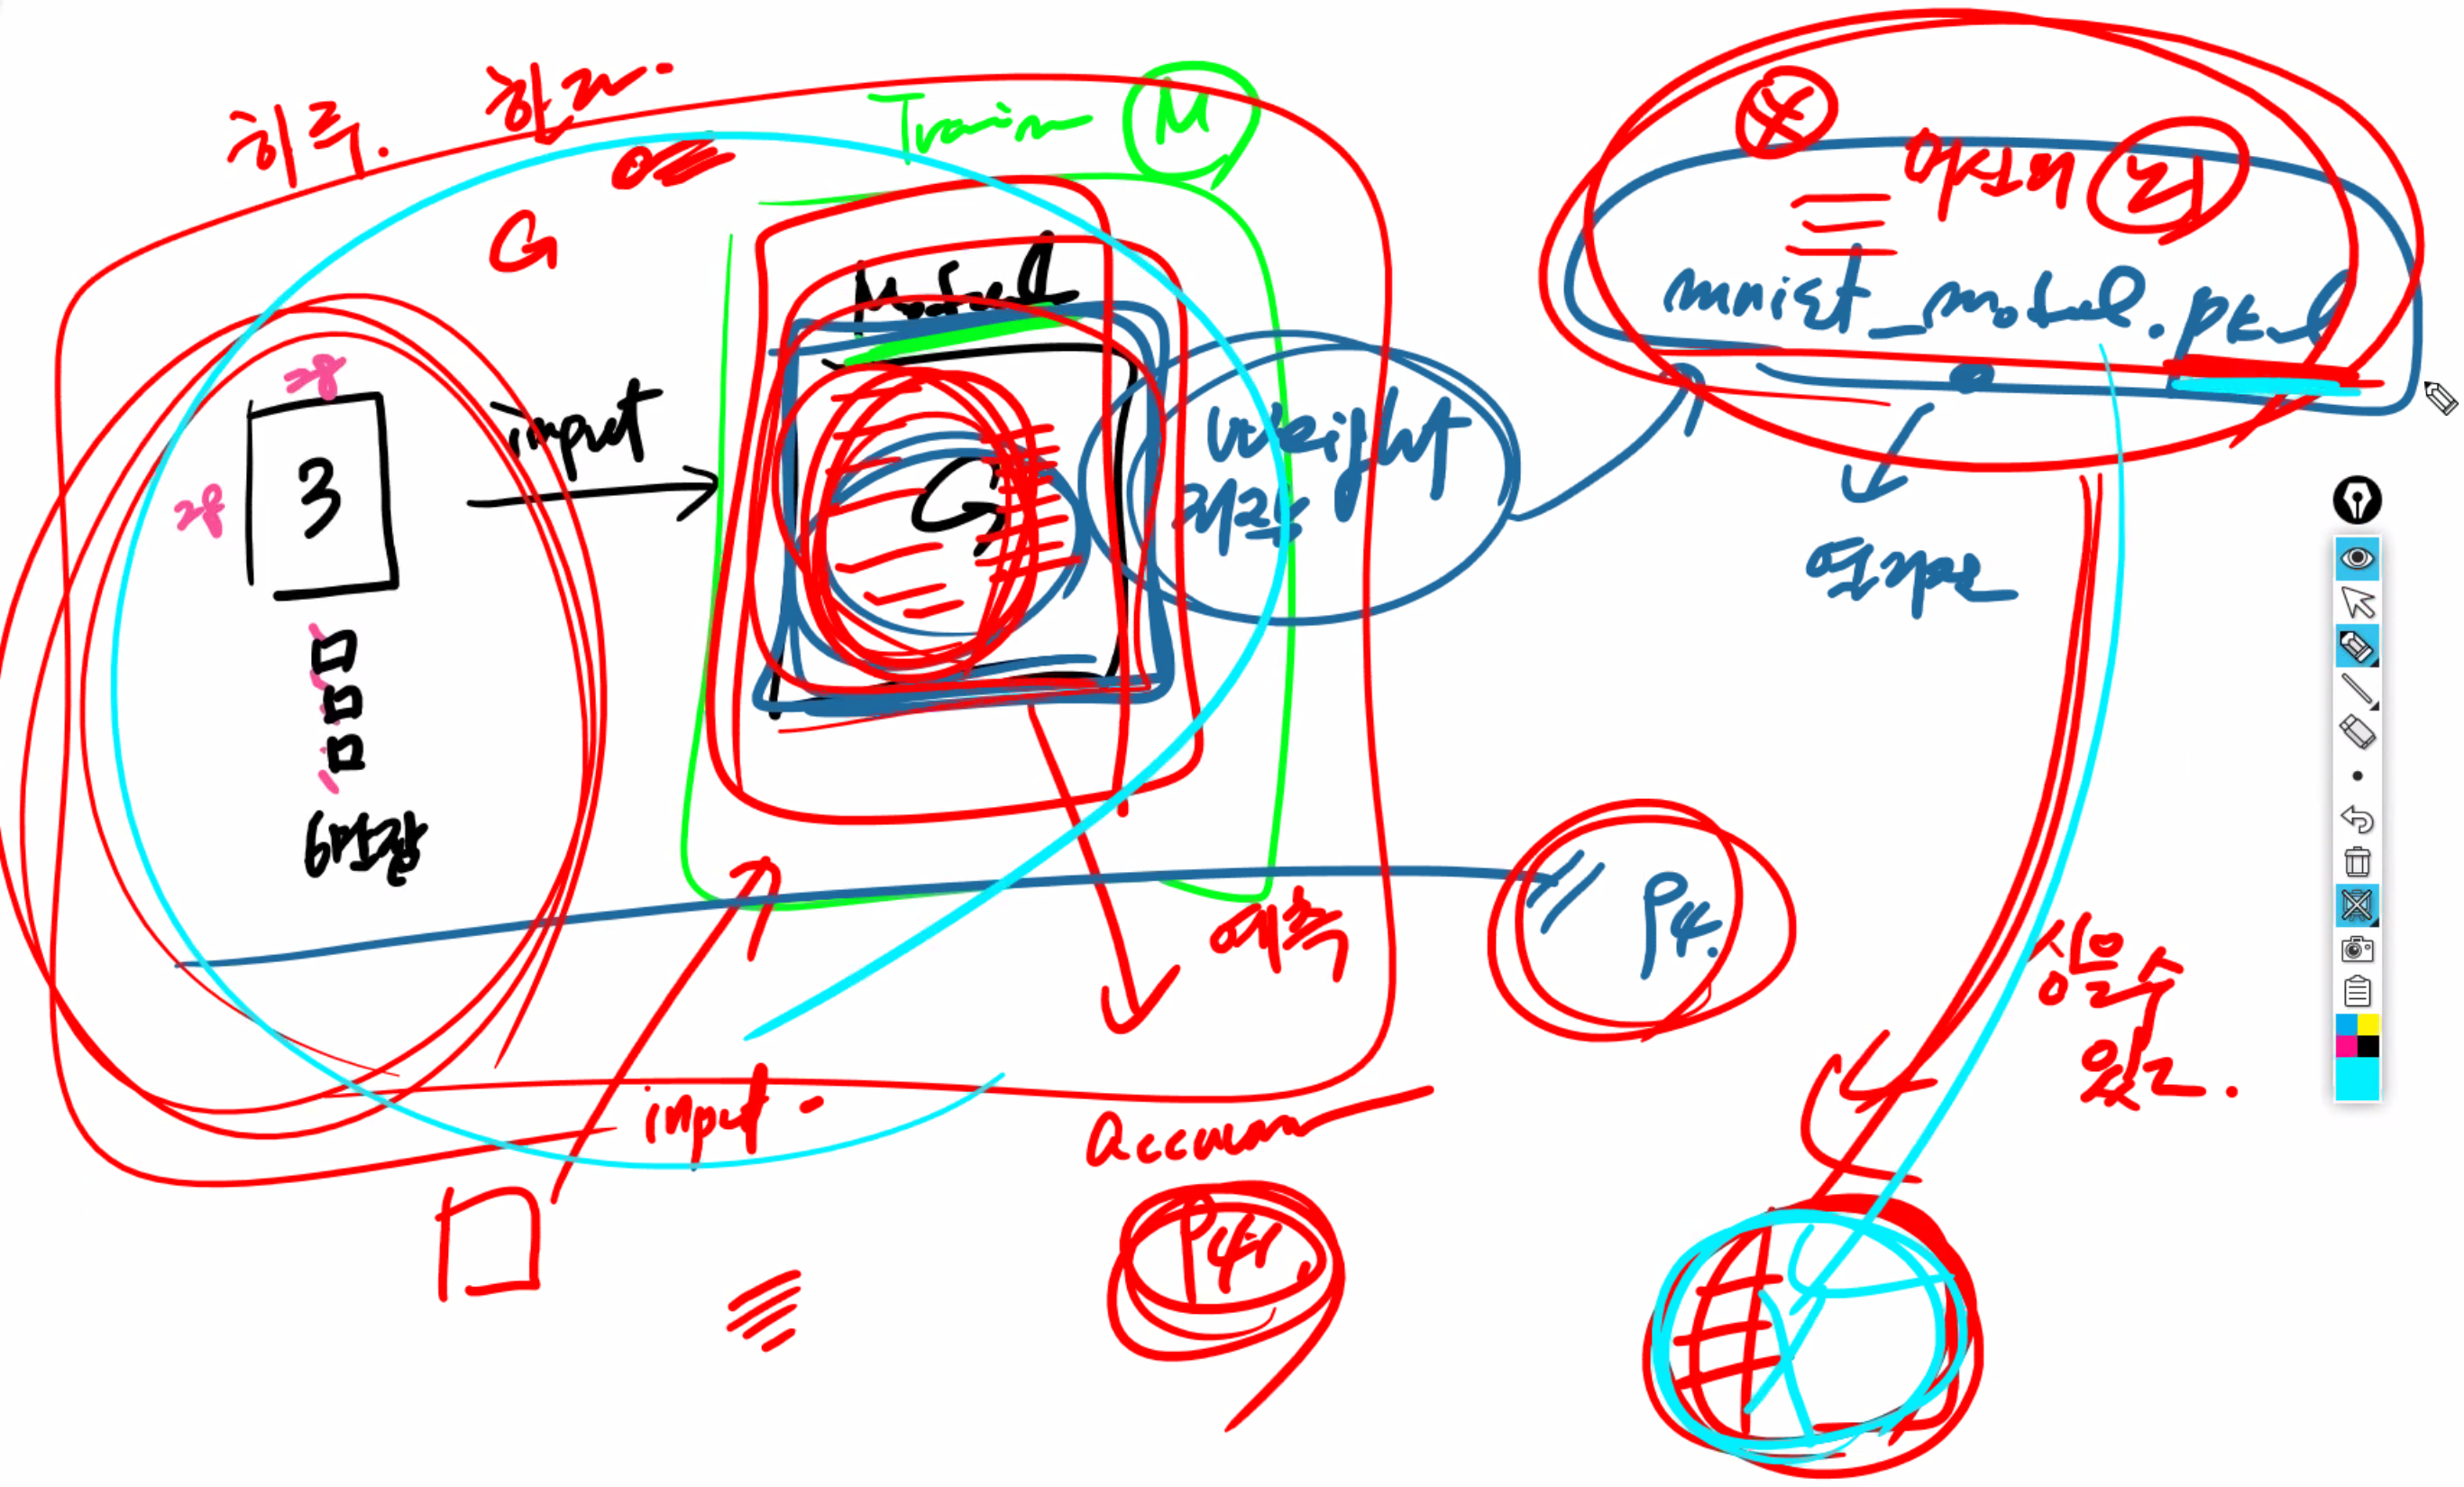

### 4. 학습한 결과를 실제 데이타로 확인해보기
#### imageio 모듈을 먼저 설치하고 시작한다. - conda install imageio

In [14]:
import imageio
import matplotlib.pyplot as plt
import tkinter as tk
from PIL import ImageDraw
from scipy import ndimage
import numpy as np
from PIL import Image
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pickle


#Load from file
with open("./mnist_model.pkl", 'rb') as file:
    model = pickle.load(file)

def crop_img(img_ndarray):
    first_row = np.nonzero(img_ndarray)[0].min()
    last_row = np.nonzero(img_ndarray)[0].max()
    middle_row = np.mean([last_row, first_row])
    # Across cols
    first_col = np.nonzero(img_ndarray)[1].min()
    last_col = np.nonzero(img_ndarray)[1].max()
    middle_col = np.mean([last_col, first_col])
    # Crop by longest non-zero to make sure all is kept
    row_length = last_row - first_row
    col_length = last_col - first_col
    length = max(row_length, col_length)
    # Minimum size of 28x28
    length = max(length, 28)
    # Get half length to add to middle point (add some padding: 1px)
    half_length = (length / 2) + 1
    # Make sure even the shorter dimension is centered
    first_row = int(middle_row - half_length)
    last_row = int(middle_row + half_length)
    first_col = int(middle_col - half_length)
    last_col = int(middle_col + half_length)
    # Crop image
    return img_ndarray[first_row:last_row, first_col:last_col]

def center_img(img_ndarray):
    com = ndimage.measurements.center_of_mass(img_ndarray)
    center = len(img_ndarray) / 2
    row_diff = int(com[0] - center)
    col_diff = int(com[1] - center)
    rows = np.zeros((abs(row_diff), img_ndarray.shape[1]))
    if row_diff > 0:
        img_ndarray = np.vstack((img_ndarray, rows))
    elif row_diff < 0:
        img_ndarray = np.vstack((rows, img_ndarray))
    cols = np.zeros((img_ndarray.shape[0], abs(col_diff)))
    if col_diff > 0:
        img_ndarray = np.hstack((img_ndarray, cols))
    elif col_diff < 0:
        img_ndarray = np.hstack((cols, img_ndarray))
    dim_diff = img_ndarray.shape[0] - img_ndarray.shape[1]
    half_A = half_B = abs(int(dim_diff / 2))
    if dim_diff % 2 != 0:
        half_B += 1
    if half_A == 0:  # 1 line off from exactly centered
        if dim_diff > 0:
            half_B = np.zeros((img_ndarray.shape[0], half_B))
            img_ndarray = np.hstack((half_B, img_ndarray))
        else:
            half_B = np.zeros((half_B, img_ndarray.shape[1]))
            img_ndarray = np.vstack((half_B, img_ndarray))
    elif dim_diff > 0:
        half_A = np.zeros((img_ndarray.shape[0], half_A))
        half_B = np.zeros((img_ndarray.shape[0], half_B))
        img_ndarray = np.hstack((img_ndarray, half_A))
        img_ndarray = np.hstack((half_B, img_ndarray))
    else:
        half_A = np.zeros((half_A, img_ndarray.shape[1]))
        half_B = np.zeros((half_B, img_ndarray.shape[1]))
        img_ndarray = np.vstack((img_ndarray, half_A))
        img_ndarray = np.vstack((half_B, img_ndarray))
    # Add padding all around (15px of zeros)
    return np.lib.pad(img_ndarray, 15, 'constant', constant_values=(0))


def resize_img(img_ndarray):
    img = Image.fromarray(img_ndarray)
    img.thumbnail((28, 28), Image.ANTIALIAS)
    return np.array(img)


def min_max_scaler(img_ndarray, final_range=(0, 1)):
    px_min = final_range[0]
    px_max = final_range[1]
    # Hard code pixel value range
    img_std = img_ndarray
    return img_std * (px_max - px_min) + px_min


def plot_digit(digit, show=True, file_name=None):
    plt.imshow(digit, cmap = 'Greys', interpolation = 'none')
    plt.tick_params(axis='both', which='both', bottom='off', top='off',
                    labelbottom='off', right='off', left='off', labelleft='off')
    if file_name is not None:
        plt.savefig(file_name)
    if show:
        plt.show()
def conver2black(x):
    return 255-x

def imageprepare(argv):
    eg_2 = imageio.imread(argv, pilmode="1")
    index = 0
    for i in eg_2:
        eg_2[index] = list(map(conver2black, i))
        index += 1
    eg_2 = crop_img(eg_2)
    eg_2 = center_img(eg_2)
    eg_2 = resize_img(eg_2)
    eg_2 = min_max_scaler(eg_2, final_range=(0, 1))
    # plot_digit(eg_2)
    eg_2 = eg_2.ravel().tolist()
    return eg_2

class ImageGenerator:
    def __init__(self, parent, posx, posy, *kwargs):
        self.parent = parent
        self.posx = posx
        self.posy = posy
        self.sizex = 250
        self.sizey = 250
        self.b1 = "up"
        self.xold = None
        self.yold = None
        self.drawing_area = tk.Canvas(self.parent, width=self.sizex, height=self.sizey + 10)
        self.drawing_area.place(x=self.posx, y=self.posy)
        self.drawing_area.bind("<Motion>", self.motion)
        self.drawing_area.bind("<ButtonPress-1>", self.b1down)
        self.drawing_area.bind("<ButtonRelease-1>", self.save)
        self.drawing_area.place(x=self.sizex / 7, y=self.sizex / 7)




        self.button1 = tk.Button(self.parent, text="Clear!", width=8, command=self.clear)
        self.button1.place(x=300, y=self.sizey - 40)

        self.text = tk.Text(self.parent, width=15, height=1)
        self.text.insert(tk.INSERT, "예상숫자 : ")
        self.text.pack()
        self.text.place(x=90, y=4)

        self.image = Image.new("1", (250, 250), (255))
        self.draw = ImageDraw.Draw(self.image)

    # def train(self, number):
    #     x = [imageprepare('./img.png')]
    #     newArr = []
    #     for i in range(784):
    #         newArr.append(x[0][i])
    #     newArr2 = []
    #     newArr2.append(newArr)
    #     newArr2.append(newArr)
    #
    #     clf.fit(newArr2, [number, number])
    #     with open('mnist_classifier.pkl', 'wb') as fid:
    #         pickle.dump(clf, fid)


    def save(self,event):
        self.b1 = "up"
        self.xold = None
        self.yold = None
        filename = "img.png"
        self.image.save(filename)
        print("예상숫자 : " + str(checkgo()))
        a = "예상숫자 : " + str(checkgo())
        self.text.delete('1.0', tk.END)
        self.text.insert(tk.INSERT, a)

    def clear(self):
        self.drawing_area.delete("all")
        self.image = Image.new("1", (250, 250), (255))
        self.draw = ImageDraw.Draw(self.image)

    def b1down(self, event):
        self.b1 = "down"

    def b1up(self, event):
        self.b1 = "up"
        self.xold = None
        self.yold = None

    def motion(self, event):
        if self.b1 == "down":
            if self.xold is not None and self.yold is not None:
                event.widget.create_line(self.xold, self.yold, event.x, event.y, smooth='true', width=3, fill='blue')
                self.draw.line(((self.xold, self.yold), (event.x, event.y)), (0), width=10)

        self.xold = event.x
        self.yold = event.y


def check():
    x = [imageprepare('./img.png')]
    newArr = []
    for i in range(784):
        newArr.append(x[0][i])
    newArr2 = []
    newArr2.append(newArr)
    test_data = newArr2

    result = model.predict(test_data)  # 숫자 예측시키기

    return result[0]


def checkgo():
    # try:
    a = check()
    return a
    # except:
    #     checkgo()

if __name__ == "__main__":
    root = tk.Tk()
    root.wm_geometry("%dx%d+%d+%d" % (400, 400, 10, 10))
    root.config(bg='gray')
    ImageGenerator(root, 10, 10)
    root.mainloop()


예상숫자 : 1
예상숫자 : 3
예상숫자 : 2
예상숫자 : 2
예상숫자 : 1
예상숫자 : 4
예상숫자 : 4
예상숫자 : 7
예상숫자 : 7
예상숫자 : 9
예상숫자 : 3
예상숫자 : 5
예상숫자 : 0
예상숫자 : 5
예상숫자 : 2
예상숫자 : 2
예상숫자 : 4
예상숫자 : 3
예상숫자 : 3
예상숫자 : 5
예상숫자 : 3
예상숫자 : 7
예상숫자 : 5
예상숫자 : 5
예상숫자 : 0
예상숫자 : 8
예상숫자 : 0
예상숫자 : 8
예상숫자 : 0
예상숫자 : 5


파이널때 사용하면 된다. pkl 파일로 계산된 데이터를 저장. 즉 뇌를 저장.

In [15]:
import graphviz